# Titanic : What it took to survive

## Introduction:

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

In this report, I will analyze the titanic dataset from kaggle with the aim of understanding what factors played an important role in passenger survival. I will go through the entire data science process - from posing my question - which in this case is simply, "What factors led to survival on the titanic?" - to wrangling the data to the exploration phase and finally drawing conclusions. 

The dataset is available at https://www.kaggle.com/c/titanic/data.  

##   Wrangling:

### Importing libraries:

In [2]:
#importing all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Loading the data and taking a look at what the first 5 entries look like

In [3]:
#load the data from the csv file and display first 5 items
data = pd.read_csv('titanic-data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### A brief description of the dataset variables:

| Variable   | Description                                                          |
|----------  |----------------------------------------------------------------------       |
| PassenegrId| The specific identification number assigned to each passenger|
| Survived   | Whether the passenger survived or not (0 = No; 1 = Yes)                                           |
| Pclass     | Ticket class,(1 = 1st; 2 = 2nd; 3 = 3rd)                          |
| Name       | Name of the passenger                                                               |
| Sex        | Passenger's sex                                                                  |
| Age        | Passenger's Age                                                                  |
| SibSp      | Number of siblings/spouses on board                                    |
| Parch      | Number of parents/children on board                                    |
| Ticket     | Passenger's ticket number                                                        |
| Fare       | Passenger's fare                                                       |
| Cabin      | Cabin number                                                                |
| Embarked   | Port of Embarkation,(C = Cherbourg; Q = Queenstown; S = Southampton) |

#### Now that we know what each variable represents, let's get some descriptive statistics on the dataset:

In [4]:
# display summary statistics of all the fields in the data
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Longley, Miss. Gretchen Fiske",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Cleaning the data:


#### Removing misleading/incomplete inforamtion:

What I am most interested in here is finding out what specific information is unavailable for a large number of passengers. I would not want those variables to factor into my analysis since we wont have information about that specific variable for a lot of the passengers in our data.

After some trivial calculations using the counts we got from the last table, we can see that about 20% of data is missing for age and a staggering 77% of data is missing for the cabin information. 

I would like to drop the cabin information from my dataframe

In [5]:
# cabin information does not help us so we will remove it from our data
data = data.drop('Cabin', 1)

In [6]:
# dispay the first 5 items again
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Succesfully dropped the cabin column

#### Replacing keys for Embarked and Pclass with actual port/class names:

In [7]:
# replace the keys for embarked data with the actual name of the port
data["Embarked"].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southhampton'}, inplace=True)

In [8]:
# replace keys for class data with the relevant class name, 'Upper' for 1, 'Middle' for 2 and 'Lower' for 3
data["Pclass"].replace({1:"Upper", 2:"Middle",3:"Lower"}, inplace = True)

In [9]:
# display the first 5 items again to see the changes
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southhampton
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southhampton
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southhampton
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southhampton


Next I am going to remove some more fields that I believe, for good reason, do not contribute to the survival chances of a person. Name and Ticket fields seem to check the box here since someone's name and ticket number can surely not affect their survival.

In [10]:
# Remove the 'Name' and 'Ticket' fields from the data
data = data.drop('Name', 1)
data = data.drop('Ticket', 1)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Lower,male,22.0,1,0,7.2500,Southhampton
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg
2,3,1,Lower,female,26.0,0,0,7.9250,Southhampton
3,4,1,Upper,female,35.0,1,0,53.1000,Southhampton
4,5,0,Lower,male,35.0,0,0,8.0500,Southhampton


In [12]:
# summary statistics for all variables
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Lower,male,NaN,NaN,NaN,NaN,Southhampton
freq,NaN,NaN,491,577,NaN,NaN,NaN,NaN,644
mean,446.000000,0.383838,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


We can see that there still exists sosme missing information. There are 2 missing fields in Embarked and 177 missing Age fields. We are going to fill these missing values in or ignore the data that does not exist. Since only 2 Embarked fields are missing it doesn't make much of a difference what we fill the fields with but I will fill it with the most recurring value. 

There are two ways I can fix the missing values problem for age. The first way is that I can fill up the missing values with the mean age which keep my data consistent. The second way is for me to ignore all the passenger entries for which the age data does not exist. The second way makes more sense for me because I would want to analyze survival based on not only age but also age coupled with other attriutes such as gender and having more than 20% people the same age can result in some misleading visualizations that can.

In [13]:
# fill in the 2 missing 'Embarked' values with the most frequent port name
data['Embarked'] = data.Embarked.fillna('Southhampton')
data.describe(include ='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Lower,male,NaN,NaN,NaN,NaN,Southhampton
freq,NaN,NaN,491,577,NaN,NaN,NaN,NaN,646
mean,446.000000,0.383838,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,257.353842,0.486592,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,1.000000,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,223.500000,0.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,446.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,668.500000,1.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN


The data is in a much more promising condition now so we can start the analysis phase

## Analysis:

### Survival By Gender

Let's take a look at what the survival data looks like for males vs females. Please note that the y-axis (% survived) represents the proportion of people who survived. For example a value of 0.5 means that 50% of the passengers survived. This will also be true for all future plots with the same y-axis label:

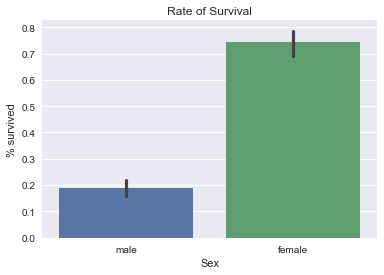

In [14]:
# display a bar plot for survival rate based on gender
plot = sns.barplot(x="Sex", y="Survived", data=data);
plot.set(xlabel = "Sex", ylabel = "% survived", title = "Rate of Survival")

The bar charts show clear evidence that gender played an important role here. Let's come back to this in each of the sections below

### Survival By Age

I would like to look at passengers' ages by their survival type so I am going to write two methods to group the data into two different categories - survived and did not survive - based on the attributes

In [15]:
# writing two functions to return survived group and unsurvived groups based on a particular attricute
def survived_group(data, attrib):
    survived = data[data['Survived'] == 1][attrib].dropna()
    return survived

In [16]:
def non_survived_group(data, attrib):
    non_survived = data[data['Survived'] == 0][attrib].dropna()
    return non_survived

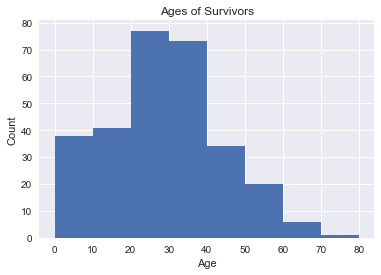

In [17]:
# get the survived group based on age and plot a histogram of the resulting data
survived_ages = survived_group(data, 'Age')
plt.hist(survived_ages.values, bins=np.arange(0,90,10))
plt.title('Ages of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

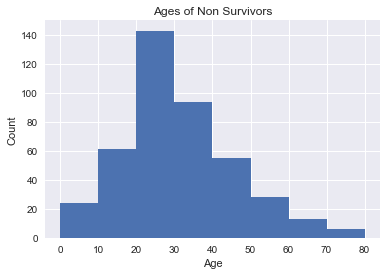

In [18]:
# get the non survived group based on age and plot a histogram of the resulting data
non_survived_ages = non_survived_group(data, 'Age')
plt.hist(non_survived_ages.values, bins=np.arange(0,90,10))
plt.title('Ages of Non Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

The only age group with more survivors than non survivors is the 0-10 year age group. Apart from that it seems like age did not play a significant role in survival on its own. Perhaps coupled with some other attricute we can make better deductions. For now, we know that there was a better chance for survival if you were aged between 0-10 which means children were sent off the boat first.

Let's create a new field in our data that has all the passengers put into age groups as well

In [19]:
# create a new field categorizing each passenger into an each group
bins =  np.arange(0,100,10)
group_by_age = pd.cut(data['Age'], bins)
group_by_age = group_by_age.to_frame(name="Age_Group")
data['Age_Group'] = group_by_age['Age_Group']
# display the first 5 fields again to see if this worked
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group
0,1,0,Lower,male,22.0,1,0,7.2500,Southhampton,"(20, 30]"
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg,"(30, 40]"
2,3,1,Lower,female,26.0,0,0,7.9250,Southhampton,"(20, 30]"
3,4,1,Upper,female,35.0,1,0,53.1000,Southhampton,"(30, 40]"
4,5,0,Lower,male,35.0,0,0,8.0500,Southhampton,"(30, 40]"


In [20]:
# group data by survival and newly created age group field and get some statistics describing the data
class_data = data.groupby('Age_Group')['Survived']
class_data.describe()

,count,mean,std,min,25%,50%,75%,max
Age_Group,,,,,,,,
"(0, 10]",64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
"(10, 20]",115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
"(20, 30]",230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
"(30, 40]",155.0,0.445161,0.498595,0.0,0.0,0.0,1.0,1.0
"(40, 50]",86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
"(50, 60]",42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
"(60, 70]",17.0,0.235294,0.437237,0.0,0.0,0.0,0.0,1.0
"(70, 80]",5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
"(80, 90]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets have some visual representation of this

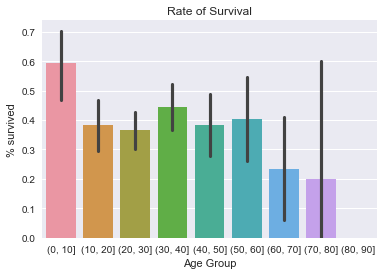

In [21]:
# display a bar plot for survival rate based on age group
plot = sns.barplot(x="Age_Group", y="Survived", data=data);
plot.set(xlabel = "Age Group", ylabel = "% survived", title = "Rate of Survival")

This confirms my above hypothesis that the 0-10 age group has the highest survival rate ~ 60%

Now let's take a look at what this data looks like for different genders

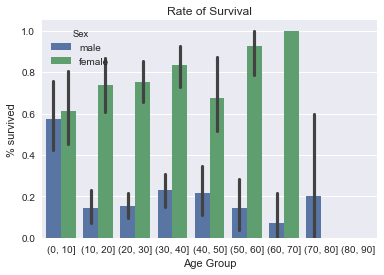

In [22]:
# display a bar plot for survival rate based on gender and age
plot = sns.barplot(x="Age_Group", y="Survived", hue = "Sex", data=data);
plot.set(xlabel = "Age Group", ylabel = "% survived", title = "Rate of Survival")

There was little difference between survival rates of boys aged 10 or less and girls aged 10 or less. Other than that female survival rate is staggeringly high for all other age groups

### Survival By Passenger Class

Lets first check what the passenger class counts looks like based on gender

Lets first check what the passenger class counts looks like based on gender

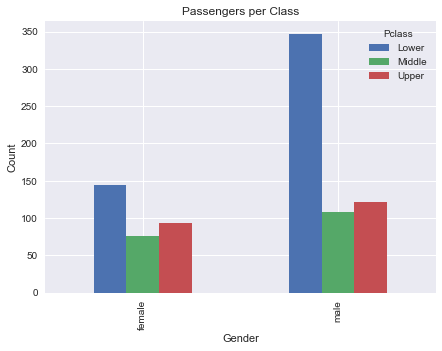

In [23]:
# display the total number of passengers for each class categorized into males and females
sex_pclass_data = data.groupby(['Sex','Pclass']).size()
sex_pclass_data = sex_pclass_data.unstack()
plot = sex_pclass_data.plot(title = "Passengers per Class", kind='bar', figsize = (7,5))
plot.set_ylabel("Count")
plot.set_xlabel("Gender")

This looks interesting. Most of the male passengers were lower class passengers however, a relatively large proportion of female passengers were middle and upper class. This makes an interesting case because we now need to figure out whether it was the high proportion of lower class male passengers that made their mean survival much lower than the females

Let's now seperate the survival and non survival groups based on Pclass

In [24]:
# get survival data based on class and see which class had the highest frequency
survived_class = survived_group(data, 'Pclass')
survived_class.describe()

count       342
unique        3
top       Upper
freq        136
Name: Pclass, dtype: object

In [25]:
# get non survival data based on class and see which class had the highest frequency
non_survived_class = non_survived_group(data, 'Pclass')
non_survived_class.describe()

count       549
unique        3
top       Lower
freq        372
Name: Pclass, dtype: object

The highest number of survivors were from the Upper class and the highest number of casualties were from the lower class

Let's group the data by Pclass and visualize it for better understanding

In [26]:
# group data by Class and Survival and look at survival rates for eacg 
class_data = data.groupby('Pclass')['Survived']
class_data.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
Lower,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0
Middle,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
Upper,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0


The result looks interesting. The better your travelling class was the higher chances you had for survival. Lets plot this out and see what the result looks like.

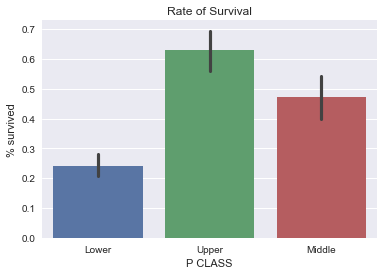

In [27]:
# display a bar plot for survival rate based on class
plot = sns.barplot(x="Pclass", y="Survived", data=data);
plot.set(xlabel = "P CLASS", ylabel = "% survived", title = "Rate of Survival")

Lets see what the result looks like for men vs women

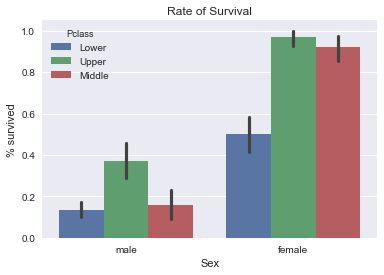

In [28]:
# display a bar plot for survival rate based on both gender and class
plot = sns.barplot(x="Sex", y="Survived", hue = 'Pclass', data=data);
plot.set(xlabel = "Sex", ylabel = "% survived", title = "Rate of Survival")

What's interesting here is that lower class men and middle class men had almost the same survival rate but the rate of survival was drastically different for lower class women vs middle class women

### Survival by number of Parents/Children and Spouses/Siblings

Lets visualize the survival rates based on the variables and see if we can spot a pattern

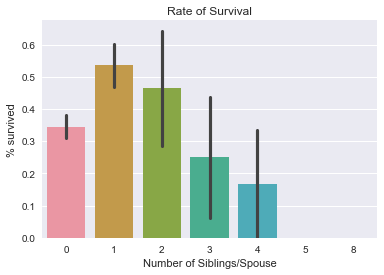

In [29]:
# display a bar plot for survival rate based on sibling and spouse data
plot = sns.barplot(x="SibSp", y="Survived", data=data);
plot.set(xlabel = "Number of Siblings/Spouse", ylabel = "% survived", title = "Rate of Survival")

Evidently it seems like having one sibling or spouse on board greatly increases your chances of survival and the chances deteriorated as the number of siblings increased (since there can only be one spouse). However, we cannot say anything for sure unless we seperate the sibling and spouse data. But still, lets take a look at what it looks like for males vs females.

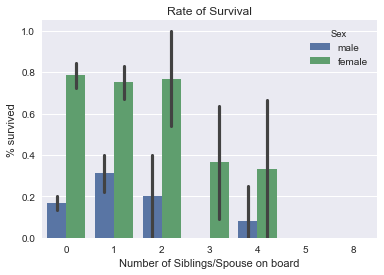

In [30]:
# display a bar plot for survival rate based on sibling and spouse data and also gender
plot = sns.barplot(x="SibSp", y="Survived", hue ="Sex", data=data);
plot.set(xlabel = "Number of Siblings/Spouse on board", ylabel = "% survived", title = "Rate of Survival")

This really doesn't tell us anything so we will move on. 

Next, lets visualize the parent/children data

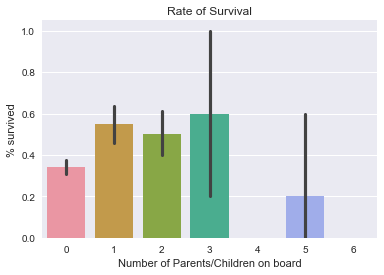

In [31]:
# display a bar plot for survival rate based on parent/children data
plot = sns.barplot(x="Parch", y="Survived", data=data);
plot.set(xlabel = "Number of Parents/Children on board", ylabel = "% survived", title = "Rate of Survival")

This too does not give us any new information as the findings look pretty random

### Survival By Fare

We will need to categorize the data into fare groups to visualize accurately what the fare data represents

In [32]:
# create new field that categorizes each passenger into a fare group
bins =  np.arange(0,251,25)
group_by_fare = pd.cut(data['Fare'], bins)
group_by_fare = group_by_fare.to_frame(name="Fare_Group")
data['Fare_Group'] = group_by_fare['Fare_Group']
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Group,Fare_Group
0,1,0,Lower,male,22.0,1,0,7.2500,Southhampton,"(20, 30]","(0, 25]"
1,2,1,Upper,female,38.0,1,0,71.2833,Cherbourg,"(30, 40]","(50, 75]"
2,3,1,Lower,female,26.0,0,0,7.9250,Southhampton,"(20, 30]","(0, 25]"
3,4,1,Upper,female,35.0,1,0,53.1000,Southhampton,"(30, 40]","(50, 75]"
4,5,0,Lower,male,35.0,0,0,8.0500,Southhampton,"(30, 40]","(0, 25]"


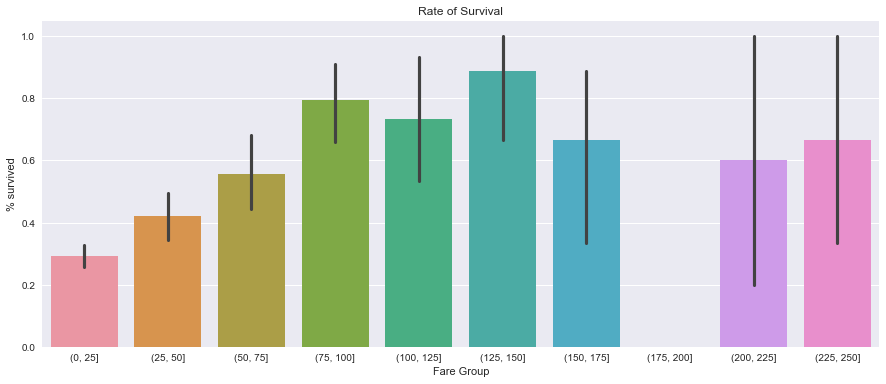

In [36]:
# display a bar plot for survival rate based on fare
fig, ax = plt.subplots(figsize=(15,6))
plot = sns.barplot(x="Fare_Group", y="Survived", data=data, ax =ax);
plot.set(xlabel = "Fare Group", ylabel = "% survived", title = "Rate of Survival")

It should be noted that the 50th percentile for fare is less than 15 dollars and the 75th percentile is 31 dollars. This means that only a very small amount of passengers bought tickets more expensive that  which is probably the upper class. The survival rate for 0 - 25 fare group is very low and survival chances only seem to be increasing with the fair price. However after a certain amount it really does not matter how much you paid since the results seem to be random. I have also omitted values larger than 250 because there were very few and were poor indicators. 

## Conclusion

I can conclude here that the factor playing the biggest role in survival was gender. Initially I realized that gender had a high potential of playing a role in survival but while analyzing the class data, an interesting feature I found about the data was that a much larger proportion of males were travelling lower class as compared to the women where a lot of them, relative to males, were travelling upper class. This made me wonder whether class had more to do with survival than gender so I played around with the data and plotting the gender data along with the class data for surviva, I found out that while upper class males had a higher survival rate, upper class females had a much higher survival rate than them. In fact, middle class women and upper class women had the highest survival rates here (> 90 %). Class did play a role in survival but not as much as gender did.

I also analyzed the age data. Plotting the age data proved difficult so I created a new field called 'Age_Groups' to group the passengers by their age and then plotted that. What I saw was that survival rates did not depend that much on age apart from the 0-10 age group which shouldn't be surprising. Children had a higher survival rate because they were given priority. Also, since gender played the biggest role, I decided to check whether gender coupled with age showed the same pattern. Not surprisingly, the 0-10 age group had little difference in survival rates for males vs females since they were all categorized as children and given priority. 

I will also reiterate that survival rates were high for people who paid higher fares but did not make much of a difference after a certain amount they paid. Its also worth reiterating that the parent/children data did not provide a lot of insight, however, having a sibling or spouse on board increased your chances of survival but only if there were 1 or 2. Increasing number of siblings decreased the survival rate


### Limitations
    
1. These results only show strong correlations and actual cause could be something completely different require  a controlled experiment

2. There were some missing values for the age data which I conveniently ignored. I could have filled them in using the mean age but I was afriad that when coupled with other factors, it might procude misleading results.

3. The dataset is only a sample of the entire titanic passenger population. I do not know what kind of sample it is but having information about the entire population would have been nicer.

## References:

1. RMS Titanic https://en.wikipedia.org/wiki/RMS_Titanic